In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
fake_df = pd.read_csv('/content/drive/MyDrive/Fake news/Fake.csv')
true_df = pd.read_csv('/content/drive/MyDrive/Fake news/True.csv')

In [ ]:
print(fake_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [ ]:
print(true_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [ ]:
true_df['label'] = 0
fake_df['label'] = 1

df = pd.concat([true_df, fake_df])
df = df.sample(frac=1).reset_index(drop=True)

print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


,title,text,subject,date,label
0,Spanish flag-waving underpins Rajoy's tough li...,MADRID (Reuters) - At Jose Luis Sosa-Dias s fa...,worldnews,"October 19, 2017",0
1,Australia finds wreck of first Allied submarin...,SYDNEY (Reuters) - Australia has discovered th...,worldnews,"December 21, 2017",0
2,UK PM May welcomes Trump's pick for U.S. ambas...,LONDON (Reuters) - The planned appointment of ...,politicsNews,"June 23, 2017",0
3,Catalonia urges EU intervention in independenc...,BRUSSELS (Reuters) - The EU should do its duty...,worldnews,"September 28, 2017",0
4,VIRAL VIDEO: Bernie Sanders Socialist Gets Shu...,"Yes, I m going to take your money and NOT give...",left-news,"Feb 23, 2016",1
5,Trump's new hire Scaramucci makes conciliatory...,WASHINGTON (Reuters) - If President Donald Tru...,politicsNews,"July 22, 2017",0
6,Raqqa evacuation included some foreign fighter...,"BEIRUT (Reuters) - Some, but not all, foreign ...",worldnews,"October 15, 2017",0
7,Mexican human rights group mulls legal action ...,MEXICO CITY (Reuters) - Mexico s National Huma...,worldnews,"December 17, 2017",0
8,Donald Trump Throws Temper Tantrum After FBI ...,Donald Trump just heard that Hillary Clinton w...,News,"July 3, 2016",1
9,Ethnically divided Iraqi town fears fresh conf...,"TUZ KHURMATU, Iraq (Reuters) - On the eve of t...",worldnews,"September 24, 2017",0


In [ ]:
df.drop(['subject', 'date'], axis=1, inplace=True)
df.head(10)

,title,text,label
0,Spanish flag-waving underpins Rajoy's tough li...,MADRID (Reuters) - At Jose Luis Sosa-Dias s fa...,0
1,Australia finds wreck of first Allied submarin...,SYDNEY (Reuters) - Australia has discovered th...,0
2,UK PM May welcomes Trump's pick for U.S. ambas...,LONDON (Reuters) - The planned appointment of ...,0
3,Catalonia urges EU intervention in independenc...,BRUSSELS (Reuters) - The EU should do its duty...,0
4,VIRAL VIDEO: Bernie Sanders Socialist Gets Shu...,"Yes, I m going to take your money and NOT give...",1
5,Trump's new hire Scaramucci makes conciliatory...,WASHINGTON (Reuters) - If President Donald Tru...,0
6,Raqqa evacuation included some foreign fighter...,"BEIRUT (Reuters) - Some, but not all, foreign ...",0
7,Mexican human rights group mulls legal action ...,MEXICO CITY (Reuters) - Mexico s National Huma...,0
8,Donald Trump Throws Temper Tantrum After FBI ...,Donald Trump just heard that Hillary Clinton w...,1
9,Ethnically divided Iraqi town fears fresh conf...,"TUZ KHURMATU, Iraq (Reuters) - On the eve of t...",0


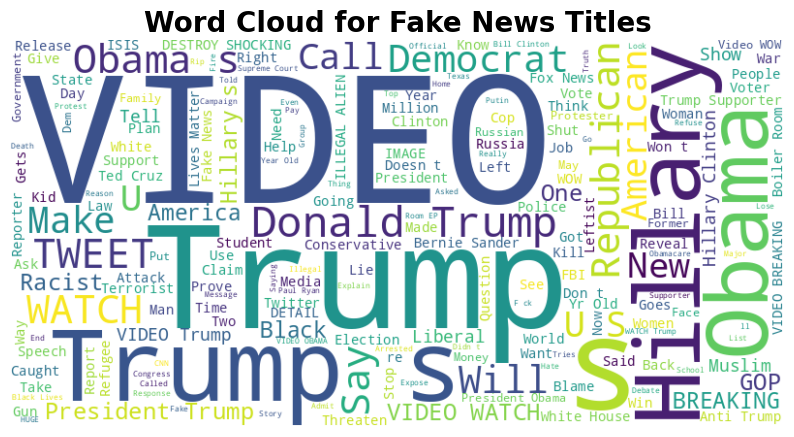

In [ ]:
from wordcloud import WordCloud
# Word cloud for fake news titles
fake_titles = ' '.join(fake_df['title'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Titles',fontsize=20,fontweight='bold')
plt.axis('off')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
# download stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # add additional stop words to remove

In [ ]:
import gensim
# Remove stopwords and remove words with 2 or less characters using gensim
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [ ]:
# Apply the function to the dataframe
df['clean'] = df['text'].apply(preprocess)


In [ ]:
# Show original news
df['text'][0]

'MADRID (Reuters) - At Jose Luis Sosa-Dias s factory near Madrid, lengths of bright red and yellow polyester are being steamed and pressed as workers rush to rebuild stocks of the Spanish flag after a huge surge in sales in the last few weeks. Patriotic displays of the flag are rare in Spain, where it still reminds many of the Franco dictatorship. But Catalonia s bid for independence has fired up national sentiment, and with it demand for flags.   We sold about 35,000 flags in 50 days. Normally we might sell 500 or 600 in a month,  said Sosa-Dias, who is originally from Uruguay.  In the 38 years I have been in Spain it is the first time I have seen so many flags on balconies and houses, and at demonstrations as Spaniards said  I am Spanish .  Such displays reflect a rising nationalism that is encouraging Prime Minister Mariano Rajoy to stick to his tough line against Catalonia. It also makes it harder to reach a compromise with the region. That nationalism was on display when hundreds 

In [ ]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['madrid', 'reuters', 'jose', 'luis', 'sosa', 'dias', 'factory', 'near', 'madrid', 'lengths', 'bright', 'yellow', 'polyester', 'steamed', 'pressed', 'workers', 'rush', 'rebuild', 'stocks', 'spanish', 'flag', 'huge', 'surge', 'sales', 'weeks', 'patriotic', 'displays', 'flag', 'rare', 'spain', 'reminds', 'franco', 'dictatorship', 'catalonia', 'independence', 'fired', 'national', 'sentiment', 'demand', 'flags', 'sold', 'flags', 'days', 'normally', 'sell', 'month', 'said', 'sosa', 'dias', 'originally', 'uruguay', 'years', 'spain', 'time', 'seen', 'flags', 'balconies', 'houses', 'demonstrations', 'spaniards', 'said', 'spanish', 'displays', 'reflect', 'rising', 'nationalism', 'encouraging', 'prime', 'minister', 'mariano', 'rajoy', 'stick', 'tough', 'line', 'catalonia', 'makes', 'harder', 'reach', 'compromise', 'region', 'nationalism', 'display', 'hundreds', 'thousands', 'spanish', 'unionists', 'staged', 'protests', 'madrid', 'barcelona', 'support', 'unity', 'catalonia', 'illegal', 'independe

In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [ ]:
list_of_words

['madrid',
 'reuters',
 'jose',
 'luis',
 'sosa',
 'dias',
 'factory',
 'near',
 'madrid',
 'lengths',
 'bright',
 'yellow',
 'polyester',
 'steamed',
 'pressed',
 'workers',
 'rush',
 'rebuild',
 'stocks',
 'spanish',
 'flag',
 'huge',
 'surge',
 'sales',
 'weeks',
 'patriotic',
 'displays',
 'flag',
 'rare',
 'spain',
 'reminds',
 'franco',
 'dictatorship',
 'catalonia',
 'independence',
 'fired',
 'national',
 'sentiment',
 'demand',
 'flags',
 'sold',
 'flags',
 'days',
 'normally',
 'sell',
 'month',
 'said',
 'sosa',
 'dias',
 'originally',
 'uruguay',
 'years',
 'spain',
 'time',
 'seen',
 'flags',
 'balconies',
 'houses',
 'demonstrations',
 'spaniards',
 'said',
 'spanish',
 'displays',
 'reflect',
 'rising',
 'nationalism',
 'encouraging',
 'prime',
 'minister',
 'mariano',
 'rajoy',
 'stick',
 'tough',
 'line',
 'catalonia',
 'makes',
 'harder',
 'reach',
 'compromise',
 'region',
 'nationalism',
 'display',
 'hundreds',
 'thousands',
 'spanish',
 'unionists',
 'staged',
 'p

In [ ]:
len(list_of_words)

8911189

In [ ]:
# Obtain the total number of unique words (using set())
total_words = len(list(set(list_of_words)))
total_words

108258

In [ ]:
# join the words into a string (words seperated by " ")
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [ ]:
df

,title,text,label,clean,clean_joined
0,Spanish flag-waving underpins Rajoy's tough li...,MADRID (Reuters) - At Jose Luis Sosa-Dias s fa...,0,"[madrid, reuters, jose, luis, sosa, dias, fact...",madrid reuters jose luis sosa dias factory nea...
1,Australia finds wreck of first Allied submarin...,SYDNEY (Reuters) - Australia has discovered th...,0,"[sydney, reuters, australia, discovered, wreck...",sydney reuters australia discovered wreck subm...
2,UK PM May welcomes Trump's pick for U.S. ambas...,LONDON (Reuters) - The planned appointment of ...,0,"[london, reuters, planned, appointment, nation...",london reuters planned appointment national fo...
3,Catalonia urges EU intervention in independenc...,BRUSSELS (Reuters) - The EU should do its duty...,0,"[brussels, reuters, duty, repository, democrat...",brussels reuters duty repository democratic va...
4,VIRAL VIDEO: Bernie Sanders Socialist Gets Shu...,"Yes, I m going to take your money and NOT give...",1,"[going, money]",going money
...,...,...,...,...,...
44893,WOW! WATCH OBAMA’S 5 MOST Threatening Comments...,A young patriot made this video to show the hy...,1,"[young, patriot, video, hypocrisy, obama, medi...",young patriot video hypocrisy obama media prot...
44894,U.S. calls for U.N. Security Council vote on N...,UNITED NATIONS (Reuters) - The United States o...,0,"[united, nations, reuters, united, states, fri...",united nations reuters united states friday to...
44895,BREAKING! NEW Wikileaks Email: Confidential Au...,The report exposed in an email shared by Wikil...,1,"[report, exposed, email, shared, wikileaks, sh...",report exposed email shared wikileaks shows re...
44896,NYC’S “PROGRESSIVE” MAYOR BEHAVES LIKE A 2-YEA...,WHAT A NUT! New York s Mayor DeBlasio gives th...,1,"[york, mayor, deblasio, gives, evil, stares, m...",york mayor deblasio gives evil stares mayor gi...


In [ ]:
nltk.download('punkt')
# return all the tokens (each and every single word) as an array of tokens
nltk.word_tokenize(df['clean_joined'][1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['sydney',
 'reuters',
 'australia',
 'discovered',
 'wreck',
 'submarine',
 'coast',
 'papua',
 'guinea',
 'authorities',
 'said',
 'thursday',
 'resolving',
 'country',
 'oldest',
 'naval',
 'mysteries',
 'century',
 'submarine',
 'allied',
 'vessel',
 'sink',
 'world',
 'patrolling',
 'german',
 'warships',
 'circumstances',
 'established',
 'australian',
 'navy',
 'private',
 'bodies',
 'final',
 'resting',
 'place',
 'vessel',
 'crew',
 'attempt',
 'defence',
 'minister',
 'marise',
 'payne',
 'told',
 'media',
 'submarine',
 'disappearance',
 'tragedy',
 'fledgling',
 'nation',
 'payne',
 'said',
 'adding',
 'small',
 'commemorative',
 'service',
 'held',
 'aboard',
 'survey',
 'ship',
 'wreck',
 'authorities',
 'trying',
 'contact',
 'crew',
 'descendants',
 'hope',
 'couple',
 'days',
 'provide',
 'relief',
 'family',
 'descendants',
 'members',
 'said',
 'navy',
 'chief',
 'vice',
 'admiral',
 'timmy',
 'barrett',
 'adding',
 'crew',
 'come',
 'australia',
 'britain',
 'zealan

In [ ]:
# length of maximum document will be needed to create word embeddings
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4398


In [ ]:
# visualize the distribution of number of words in a text
import plotly.express as px #interactive visualizations
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()


In [ ]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.label, test_size = 0.2)

In [ ]:
from nltk import word_tokenize

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
len(train_sequences)

35918

In [ ]:
len(test_sequences)

8980

In [ ]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 madrid reuters jose luis sosa dias factory near madrid lengths bright yellow polyester steamed pressed workers rush rebuild stocks spanish flag huge surge sales weeks patriotic displays flag rare spain reminds franco dictatorship catalonia independence fired national sentiment demand flags sold flags days normally sell month said sosa dias originally uruguay years spain time seen flags balconies houses demonstrations spaniards said spanish displays reflect rising nationalism encouraging prime minister mariano rajoy stick tough line catalonia makes harder reach compromise region nationalism display hundreds thousands spanish unionists staged protests madrid barcelona support unity catalonia illegal independence referendum triggered constitutional crisis clouded prospects europe fifth largest economy according monthly official opinion poll level concern spaniards situation catalonia increased threefold september compared august majority feel national regional i

In [ ]:
from keras.preprocessing.sequence import pad_sequences
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
# Make sure all different samples have the same length (fillted 0 s for missing)
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [ ]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
The padded encoding for document 2  is :  [  24    6   18   11 1165  146 2241  283  889 1131  120   61    2 1783
  294 1853  239    1   42    3 9541 1165  146 4401  615 1783    2   78
   18   11    2 6909 3810    3    8    1  288  146  322 4401]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# Sequential Model
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128))) # no of neurons

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         13857024  
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14153217 (53.99 MB)
Trainable params: 14153217 (53.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_train = np.asarray(y_train)

In [48]:
# tb  b g vcccn ,m  mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmrain the model

history=model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
506/506 [==============================] - 268s 528ms/step - loss: 3.4062e-04 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 0.9994
Epoch 2/2
506/506 [==============================] - 255s 504ms/step - loss: 3.7336e-04 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 0.9994


In [49]:
# make prediction
pred = model.predict(padded_test)

281/281 [==============================] - 14s 45ms/step


In [50]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [51]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9815144766146994


<Axes: >

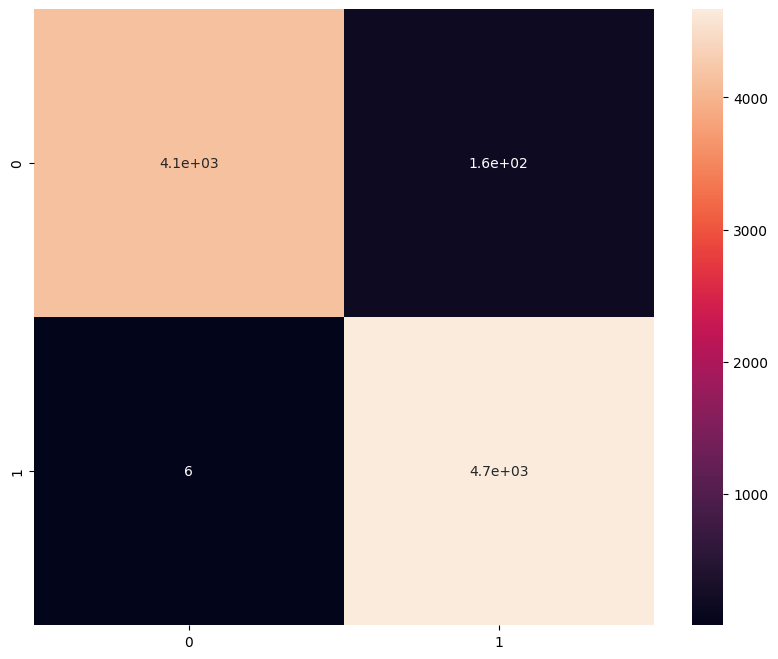

In [53]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True)

In [54]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}